In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
data = pd.read_excel(r'D:\pythonCode\Sector Mapping\Sector_data_with_outliers.xlsx')
print (data)
data = data[data['Outlier'] == 'Inlier']
print(data)

                 GSTIN            HSN          Sector  Sector Code  \
0      22BMWPM3936L1ZF       00440013     Advertising            1   
1      22AKZPR2078L1ZD       00440013     Advertising            1   
2      22AUTPB4627K1ZI       00440013     Advertising            1   
3      22ATSPG2600F2Z5       00440013     Advertising            1   
4      22AKFPS5510C1ZO       00440013     Advertising            1   
...                ...            ...             ...          ...   
44380  22ABKPK5356J2ZI         999621  Works Contract           59   
44381  22ARNPR6016R1Z5  999633,995428  Works Contract           59   
44382  22AAFFO7423E1ZM  999691,999699  Works Contract           59   
44383  22AYQPG4386D1ZF         999799  Works Contract           59   
44384  22DKIPK2459A1ZK         999799  Works Contract           59   

       Anomaly_Score Outlier  
0           0.012104  Inlier  
1           0.012104  Inlier  
2           0.012104  Inlier  
3           0.012104  Inlier  
4   

In [3]:
# Encode the 'Type' column using LabelEncoder
label_encoder = LabelEncoder()
data['Sector_1'] = label_encoder.fit_transform(data['Sector'])

In [4]:
# Tokenize and vectorize the 'Tags' column using CountVectorizer
vectorizer = CountVectorizer(tokenizer=lambda x: x.split(','))
X = vectorizer.fit_transform(data['HSN'])

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, data['Sector_1'], test_size=0.2, random_state=42)


In [6]:
# Initialize and train the decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [7]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

In [8]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.464129016957192


In [ ]:
# For predicting the type of a new movie based on tags:
new_tags = "tag1, tag2, tag3"  # Replace with the tags of the new movie
new_tags_vector = vectorizer.transform([new_tags])
predicted_type = label_encoder.inverse_transform(clf.predict(new_tags_vector))
print(f"Predicted Type: {predicted_type[0]}")

In [9]:
new_data = pd.read_excel(r'D:\pythonCode\Sector Mapping\DealerUnmapped.xlsx')

In [10]:
new_tags_vector = vectorizer.transform(new_data['HSN'])

In [11]:
predicted_types = label_encoder.inverse_transform(clf.predict(new_tags_vector))


In [12]:
new_data['Predicted_Type'] = predicted_types

In [13]:
new_data.to_excel(r'D:\pythonCode\Sector Mapping\decisionTrees_results.xlsx', index=False, engine='openpyxl')


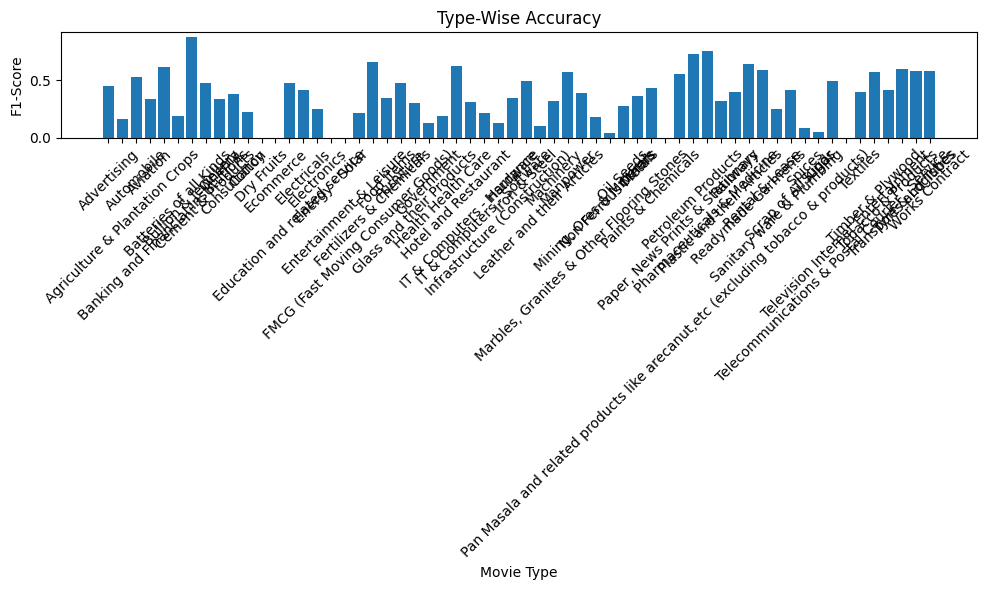

In [14]:
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_, output_dict=True)
type_wise_accuracies = {label: report[label]['f1-score'] for label in label_encoder.classes_}

# Display type-wise accuracy as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(type_wise_accuracies.keys(), type_wise_accuracies.values())
plt.xlabel('Movie Type')
plt.ylabel('F1-Score')
plt.title('Type-Wise Accuracy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [15]:
# Alternatively, you can print type-wise accuracy as a matrix
type_wise_accuracies = {label: report[label]['f1-score'] for label in label_encoder.classes_}

type_wise_accuracy_matrix = pd.DataFrame.from_dict(type_wise_accuracies, orient='index', columns=['F1-Score'])
print(type_wise_accuracy_matrix)

                                                    F1-Score
Advertising                                         0.451613
Agriculture & Plantation Crops                      0.161850
Automobile                                          0.524823
Aviation                                            0.333333
Banking and Financial Institutions                  0.620000
Batteries of all Kinds                              0.190476
Bullion & Jewellery                                 0.875912
Cement & Products                                   0.472505
Cinema                                              0.333333
Consultancy                                         0.381579
Cotton                                              0.225000
Dry Fruits                                          0.000000
Ecommerce                                           0.000000
Education and related service                       0.478261
Electricals                                         0.418605
Electronics             